<a href="https://colab.research.google.com/github/Pierre-Portfolio/GenerateBannerLogo/blob/main/GenerateBanner.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
!pip install Pillow requests

In [15]:
import requests
from io import BytesIO
from PIL import Image, ImageDraw, ImageFont
import random


✅ Image générée (Clean Dark Mode) : tech_wallpaper_clean.png


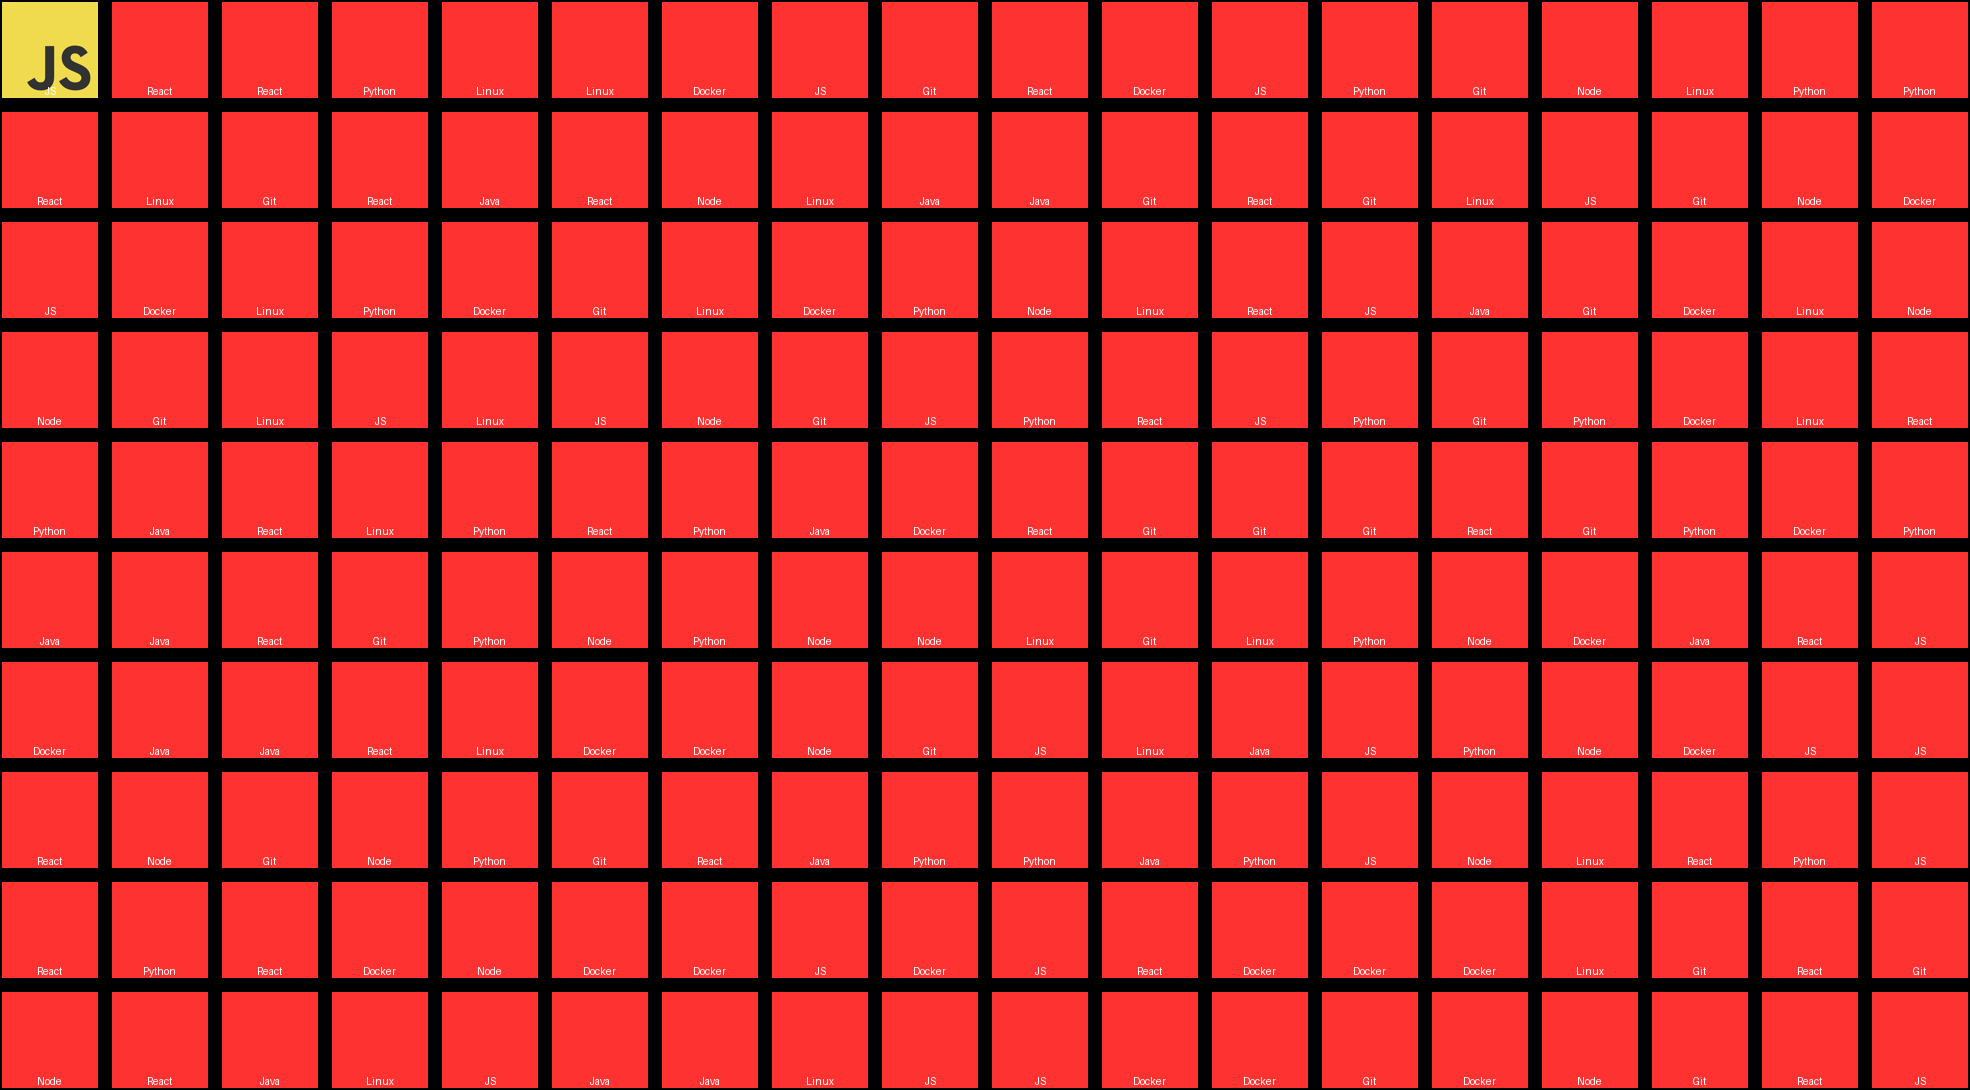

In [16]:

# Configuration de la session avec User-Agent
session = requests.Session()
session.headers.update({
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36'
})

def download_image(url):
    try:
        response = session.get(url, timeout=10)
        response.raise_for_status()
        return Image.open(BytesIO(response.content)).convert("RGBA")
    except Exception as e:
        # Image de remplacement (fond rouge si erreur)
        return Image.new('RGBA', (100, 100), (255, 50, 50, 255))

def create_tech_wallpaper(tools_data, rows=10, cols=18, box_size=100, gap=10, output_filename="tech_wallpaper_clean.png"):
    """
    Génère un wallpaper 'Dark Mode' sans carrés de fond.
    """

    # Calcul de la taille totale (en gardant l'espacement)
    img_width = (cols * box_size) + ((cols - 1) * gap)
    img_height = (rows * box_size) + ((rows - 1) * gap)

    # Fond NOIR
    final_image = Image.new('RGB', (img_width, img_height), color=(0, 0, 0))
    draw = ImageDraw.Draw(final_image)

    # Police (Texte BLANC cette fois)
    try:
        font = ImageFont.truetype("arial.ttf", 12)
    except IOError:
        font = ImageFont.load_default()

    # Remplissage de la grille
    for i in range(rows * cols):
        item = random.choice(tools_data)

        name = item['key']
        url = item['content']

        col = i % cols
        row = i // cols

        # Position de la cellule (avec l'espacement noir)
        x_offset = col * (box_size + gap)
        y_offset = row * (box_size + gap)

        # --- PLUS DE CARRÉ DE FOND (Rectangle commenté) ---
        # draw.rectangle([x_offset, y_offset, x_offset + box_size, y_offset + box_size], fill=bg_color)

        # --- Icône ---
        # On prend un peu plus de place pour l'icône puisqu'il n'y a plus de bordure de carré
        icon_padding = 2
        icon_size_target = box_size - (icon_padding * 2)

        img = download_image(url)
        img.thumbnail((icon_size_target, icon_size_target))

        # Centrage vertical et horizontal dans la zone allouée
        icon_x = x_offset + (box_size - img.width) // 2
        icon_y = y_offset + (box_size - img.height) // 2

        final_image.paste(img, (icon_x, icon_y), img)

        # --- Texte ---
        # Texte BLANC pour être visible sur le fond noir
        text_bbox = draw.textbbox((0, 0), name, font=font)
        text_width = text_bbox[2] - text_bbox[0]

        text_x = x_offset + (box_size - text_width) // 2
        # On place le texte tout en bas de la zone (box_size)
        text_y = y_offset + box_size - 15

        draw.text((text_x, text_y), name, fill="white", font=font)

    final_image.save(output_filename)
    print(f"✅ Image générée (Clean Dark Mode) : {output_filename}")

    # Affichage
    try:
        final_image.show()
    except:
        pass
    try:
        from IPython.display import display
        display(final_image)
    except:
        pass

    return final_image

# --- LISTE DES 8 LOGICIELS ---
test_data = [
    {"key": "Python", "content": "https://upload.wikimedia.org/wikipedia/commons/c/c3/Python-logo-notext.svg"},
    {"key": "Java", "content": "https://upload.wikimedia.org/wikipedia/en/3/30/Java_programming_language_logo.svg"},
    {"key": "JS", "content": "https://upload.wikimedia.org/wikipedia/commons/6/6a/JavaScript-logo.png"},
    {"key": "Git", "content": "https://upload.wikimedia.org/wikipedia/commons/e/e0/Git-logo.svg"},
    {"key": "Docker", "content": "https://upload.wikimedia.org/wikipedia/commons/4/4e/Docker_(container_engine)_logo.svg"},
    {"key": "React", "content": "https://upload.wikimedia.org/wikipedia/commons/a/a7/React-icon.svg"},
    {"key": "Node", "content": "https://upload.wikimedia.org/wikipedia/commons/d/d9/Node.js_logo.svg"},
    {"key": "Linux", "content": "https://upload.wikimedia.org/wikipedia/commons/3/35/Tux.svg"}
]

# Exécution
if __name__ == "__main__":
    create_tech_wallpaper(test_data, rows=10, cols=18, box_size=100, gap=10)